In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
from prophet.python import fbprophet
from prophet.python.fbprophet import models
from prophet.python.fbprophet import plot
from prophet.python.fbprophet import diagnostics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pkg_resources
import os
from pathlib import Path
import numpy as np
import scipy
from copy import deepcopy
import tqdm

import metrics_refactored

import json
from prophet.python.fbprophet.serialize import model_to_json, model_from_json

from make_datasets import data, datasets, format_for_prophet, dataset_generator

/Users/leevironty/koodi/kandi/venv/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/leevironty/koodi/kandi/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [4]:
metric_results = pd.read_csv('big_fit.csv')

In [7]:
fit_results = pd.read_pickle('all_fitted_models.pkl')

In [9]:
fit_results['model'] = fit_results['model'].apply(model_from_json)

Importing plotly failed. Interactive plots will not work.


In [15]:
for dset_name, chunk in metric_results.groupby('dataset_name'):
    print(f'\n{dset_name}\n')
    pivoted = chunk.pivot(index='model_name', columns='metric_name', values='value')
    print(pivoted)
    #pivoted.to_csv(f'{dset_name}_metrics.csv')


aggregated_A

metric_name  10-fold_cv         AIC         DIC        WAIC  default_cv
model_name                                                             
m1           205.388146 -394.399183 -438.827668  -15.901158    0.033642
m2           208.157005 -384.561730 -431.473106  136.515574    0.044520
m3           349.561636 -654.489989 -702.099875 -669.252312    0.021928
m4           164.058566 -457.357927 -512.371022  -41.615058    0.027533
m5           351.272778 -703.916265 -703.162728 -707.848854    0.025284

aggregated_B

metric_name  10-fold_cv         AIC         DIC        WAIC  default_cv
model_name                                                             
m1           204.185346 -374.310491 -419.051590   19.298702    0.027946
m2           196.886356 -365.501722 -412.157199  315.892210    0.049418
m3           347.317002 -647.787319 -695.264847 -663.160919    0.025492
m4           162.142095 -446.907473 -501.358278  152.229439    0.028635
m5           348.932425 -699.39598

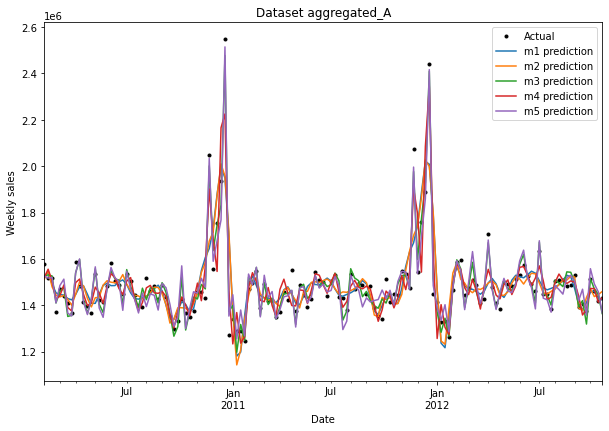

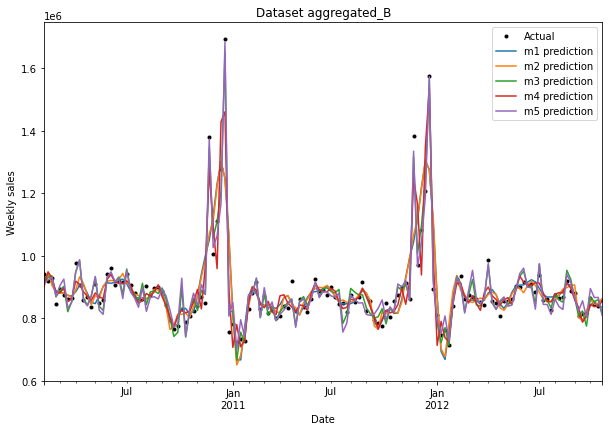

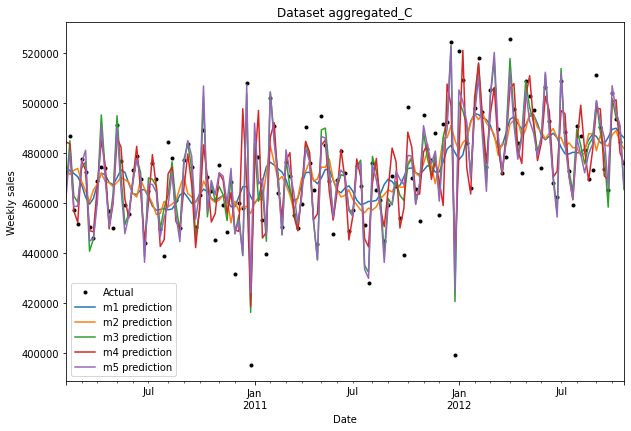

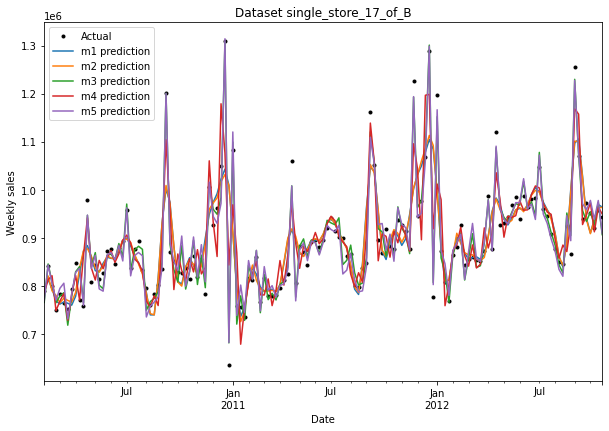

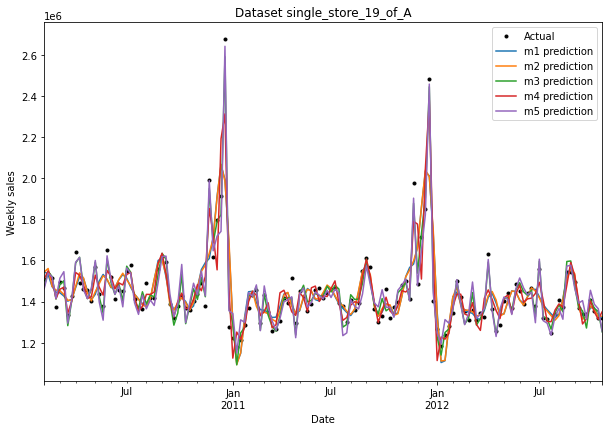

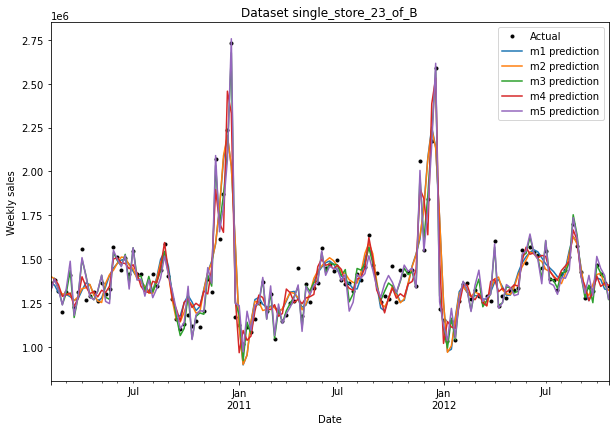

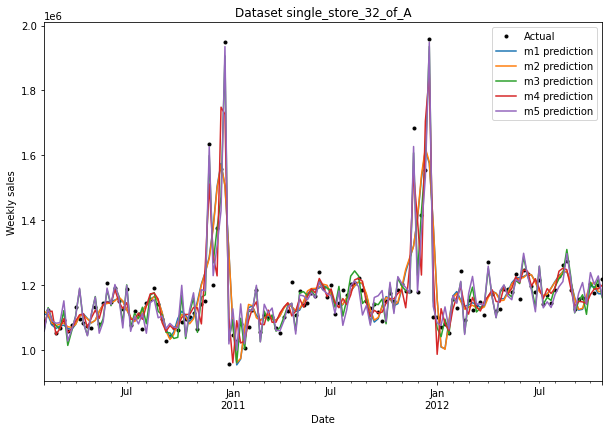

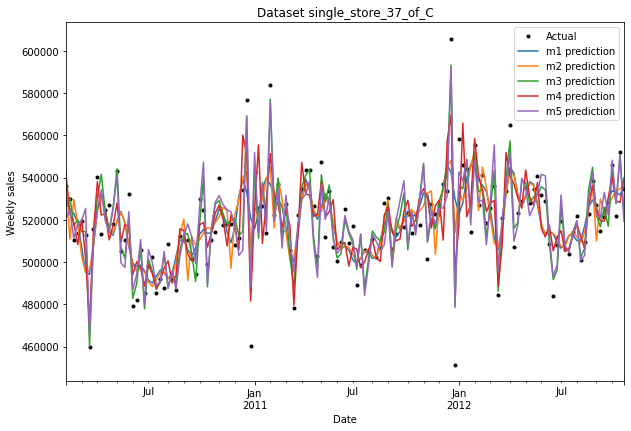

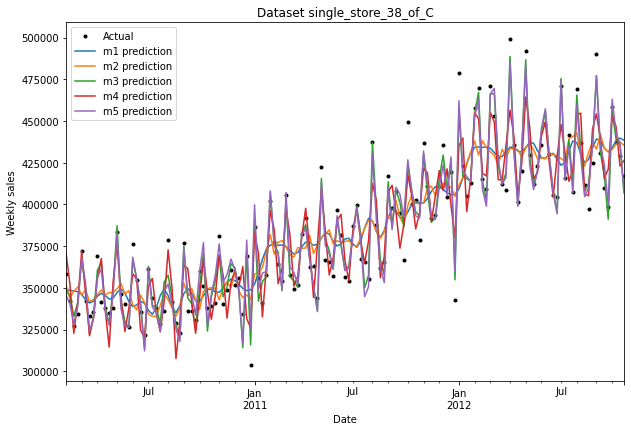

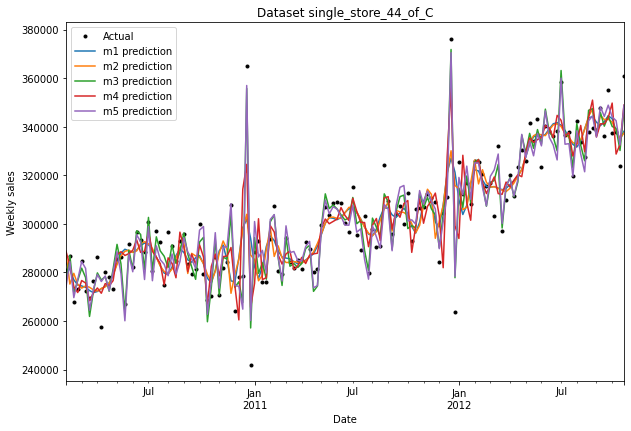

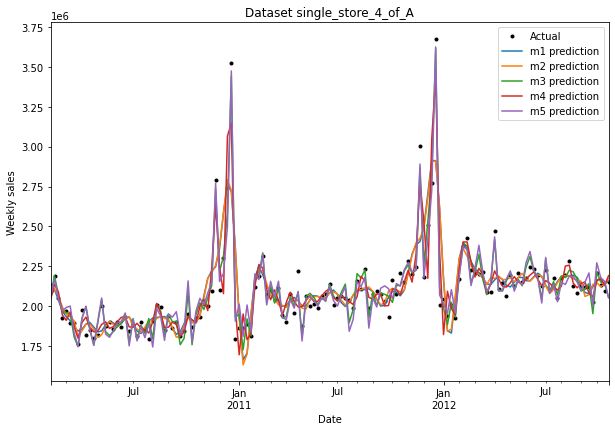

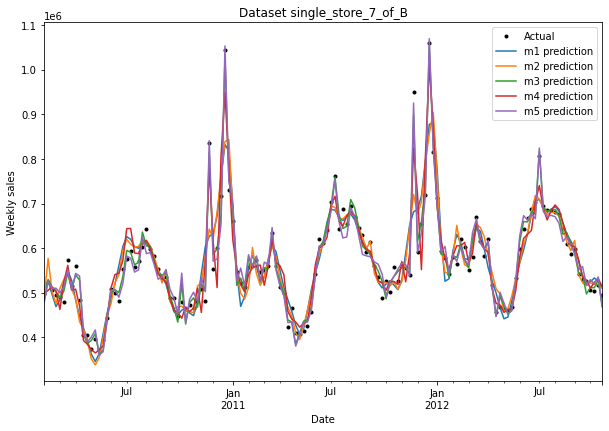

In [59]:
for dset_name, chunk in fit_results.groupby('dataset_name'):
    fig, ax = plt.subplots(figsize=(10, 6.6))
    chunk.iloc[0,0].history.plot(x='ds', y='y', style='k.', ax=ax, label='Actual')
    for _, row in chunk.iterrows():
        pred = row['model'].predict()
        pred.plot(ax=ax, x='ds', y='yhat', label=f'{row["model_name"]} prediction')
    ax.set_ylabel('Weekly sales')
    ax.set_xlabel('Date')
    ax.set_title(f'Dataset {dset_name}');
    plt.savefig(f'plots/model_fits_{dset_name}.eps')

In [30]:
single_store_19_dataset = fit_results[fit_results['dataset_name'] == 'single_store_19_of_A']['model'].iloc[0].history

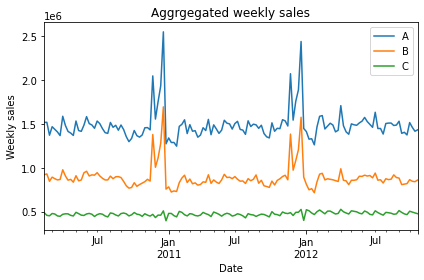

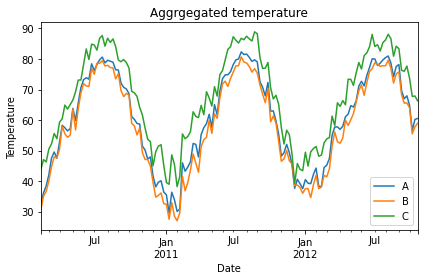

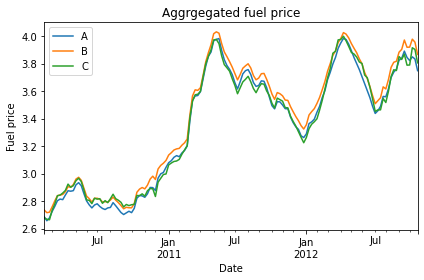

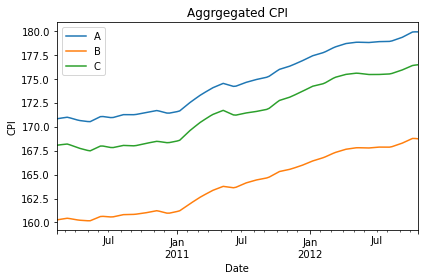

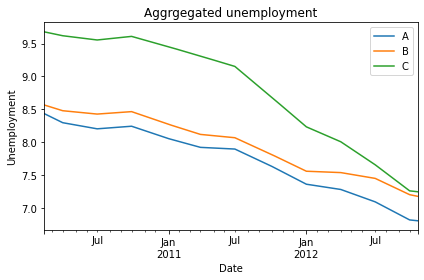

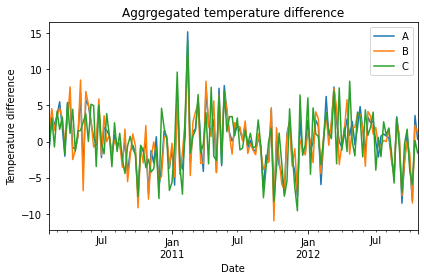

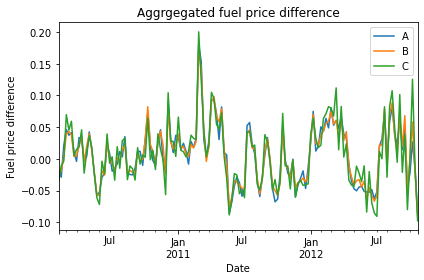

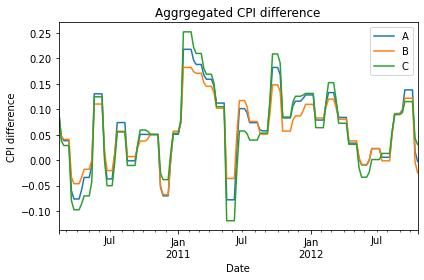

In [66]:
#features = ['y', 'temperature', 'fuel_price', 'cpi', 'unemployment_interpolated', 'temp_diff', 'fuel_diff', 'cpi_diff']
plot_names = {'y':'Weekly sales', 'temperature':'Temperature', 
              'fuel_price':'Fuel price', 'cpi':'CPI', 
              'unemployment_interpolated':'Unemployment',
              'temp_diff': 'Temperature difference',
              'fuel_diff': 'Fuel price difference',
              'cpi_diff': 'CPI difference'}
for feature, plot_label in plot_names.items():
    ax = plt.subplot()
    for key in datasets.keys():
        datasets[key].plot(x='ds', y=feature, ax=ax, label=key)
    ax.set_ylabel(plot_label)
    ax.set_xlabel('Date')
    ax.set_title(f'Aggrgegated {plot_label.lower() if "CPI" not in plot_label else plot_label}')
    plt.tight_layout()
    plt.savefig(f'plots/dataset_plot_{feature}.eps')
    plt.show()

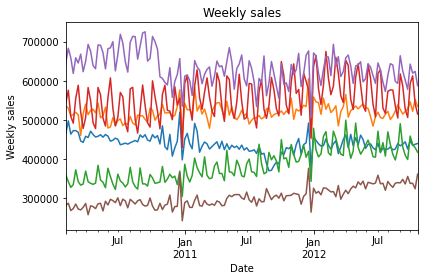

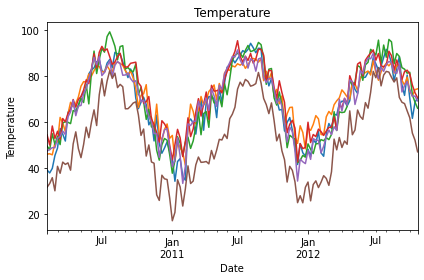

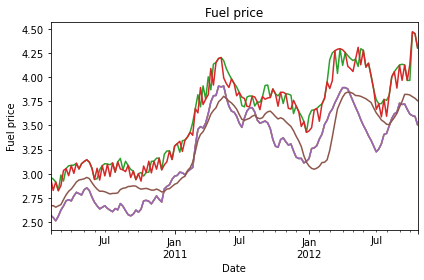

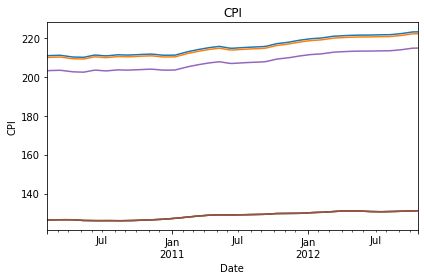

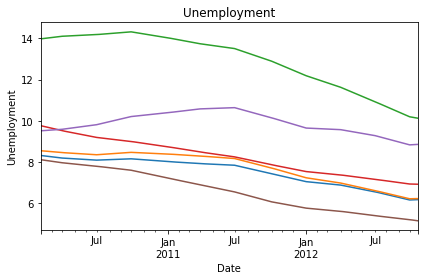

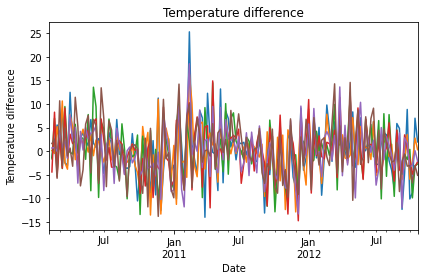

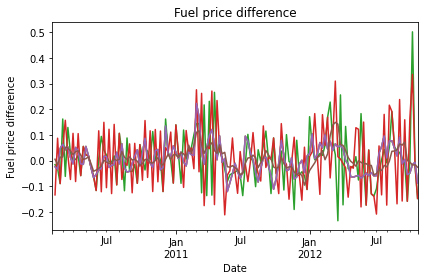

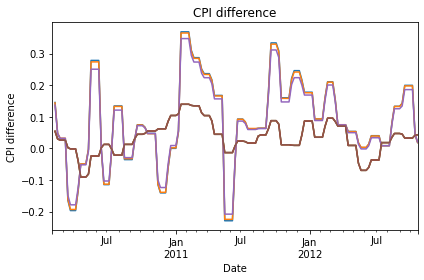

In [72]:
plot_names = {'Weekly_Sales':'Weekly sales', 'Temperature':'Temperature', 
              'Fuel_Price':'Fuel price', 'CPI':'CPI', 
              'unemployment_interpolated':'Unemployment',
              'temp_diff': 'Temperature difference',
              'fuel_diff': 'Fuel price difference',
              'cpi_diff': 'CPI difference'}
for feature, plot_label in plot_names.items():
    ax = plt.subplot()
    
    data[data['Type']=='C'].pivot(index='Date', columns='Store', values=feature).plot(ax=ax, legend=False, title=plot_label)

    #datasets[key].plot(x='ds', y=feature, ax=ax, label=key)
    ax.set_ylabel(plot_label)
    ax.set_xlabel('Date')
    #ax.set_title(f'Aggrgegated {plot_label.lower() if "CPI" not in plot_label else plot_label}')
    plt.tight_layout()
    #plt.savefig(f'plots/dataset_plot_{feature}.eps')
    plt.show()

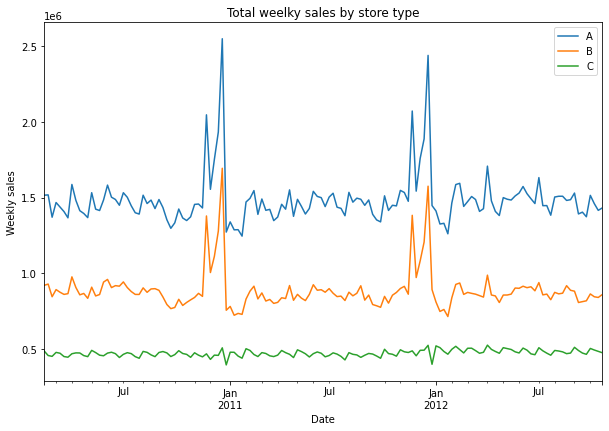

In [56]:
fig, ax = plt.subplots(figsize=(10, 6.6))
for l in 'ABC':
    datasets[l].plot(x='ds', y='y', ax=ax, label=l)
ax.set_title('Total weelky sales by store type')
ax.set_ylabel('Weekly sales')
ax.set_xlabel('Date');